
## 策略： 反轉做多策略

### 第一部分 量化策略程式設計

程式設計邏輯：

先創造一個 “動態個股進場條件池” 以及 “交易紀錄池”

我大致上分成兩大部分

1. 進場機器人 （監測動態個股進場條件池、紀錄進場資訊）

    a. 9.00 到 9.01 (這段時間不會進場)

    b. 9.01 到收盤

    c. 進場 Condition 1 : 一分鐘內成交量大於開盤前一分鐘
           Condition 2 : 兩分鐘內連續跌超過 2 %



2. 出場機器人 （監控交易紀錄池、賣掉部位）

    a. 停利機制

    b. 停損機制

    c. 平倉機制


#### 監測動態個股進場條件池、紀錄進場資訊

In [1]:
import pandas as pd
import numpy as np


raw_data = pd.DataFrame()



def construct_monitor_dict():
    stock_dict = dict()
    
    for i in raw_data["asset"].unique():
        stock_dict[i] = {"one_minute_time_tick": list(), 
                         "one_minute_volume_tick": list(), 
                         "two_minute_time_tick": list(), 
                         "two_minute_price_tick": list(), 
                         
                         "first_minute_accumulative_volume": 0 , 
                         "accumulative_drop": 0, 
                         "accumulative_volume": 0}
        
    return stock_dict






def construct_portfolio_dict():
    stock_dict = dict()
    
    for i in raw_data["asset"].unique():
        stock_dict[i] = {"time_long": list(),
                         "price_long": list(),
                         "time_short": list(),
                         "price_short": list(),
                         "status": list(),
                         "amount": list(),
                         "return": list(),
                         "volume_long": list()}
        
        ####   status{ -1: 持有部位, 0: 停損, 1: 停利, 2: 收盤回補}          ####
        
        
    return stock_dict





def long_stock(asset, time, price, volume):
    
    stock_portfolio[asset]["time_long"].append(time)
    stock_portfolio[asset]["price_long"].append(price)
    stock_portfolio[asset]["time_short"].append(-1)
    stock_portfolio[asset]["price_short"].append(-1)
    stock_portfolio[asset]["status"].append(-1)
    stock_portfolio[asset]["amount"].append(1)
    stock_portfolio[asset]["return"].append(-1)
    stock_portfolio[asset]["volume_long"].append(volume)
    
    ##############
    # Condition 1
    ##############
    
    monitor_dict[asset]["one_minute_time_tick"] = list()
    monitor_dict[asset]["one_minute_volume_tick"] = list()
    
    
    monitor_dict[asset]["accumulative_volume"] = 0
    
    
    ##############
    # Condition 2
    ##############
    monitor_dict[asset]["two_minute_time_tick"] = [time]
    monitor_dict[asset]["two_minute_price_tick"] = [price]
    
    monitor_dict[asset]["accumulative_drop"] = monitor_dict[asset]["two_minute_price_tick"][0] - price
    
    
    
    

monitor_dict = dict()

stock_portfolio = dict()



#### 進場機器人

In [ ]:




def long_stock_robot_0900_0901_newdata(asset, time, price, volume):
    
    ##############
    # Condition 1
    ##############
    
    monitor_dict[asset]["first_minute_accumulative_volume"] = monitor_dict[asset]["first_minute_accumulative_volume"] + volume
    
    
    ##############
    # Condition 2
    ##############
    monitor_dict[asset]["two_minute_time_tick"].append(time)
    monitor_dict[asset]["two_minute_price_tick"].append(price)
    monitor_dict[asset]["accumulative_drop"] = monitor_dict[asset]["two_minute_price_tick"][0] - price
    
def long_stock_robot_0900_0901_rise(asset, time, price, volume):
    
    ##############
    # Condition 1
    ##############
    
    monitor_dict[asset]["first_minute_accumulative_volume"] = monitor_dict[asset]["first_minute_accumulative_volume"] + volume
    
    
    ##############
    # Condition 2
    ##############
    monitor_dict[asset]["two_minute_time_tick"] = [time]
    monitor_dict[asset]["two_minute_price_tick"] = [price]
    monitor_dict[asset]["accumulative_drop"] = 0
    
def long_stock_robot_0900_0901_drop(asset, time, price, volume):
    
    ##############
    # Condition 1
    ##############
    
    monitor_dict[asset]["first_minute_accumulative_volume"] = monitor_dict[asset]["first_minute_accumulative_volume"] + volume
    
    
    ##############
    # Condition 2
    ##############
    monitor_dict[asset]["two_minute_time_tick"].append(time)
    monitor_dict[asset]["two_minute_price_tick"].append(price)
    monitor_dict[asset]["accumulative_drop"] = monitor_dict[asset]["two_minute_price_tick"][0] - price
    







def long_stock_robot_after_0901_newdata(asset, time, price, volume):
    
    
    ##############
    # Condition 1
    ##############
    
    monitor_dict[asset]["one_minute_time_tick"].append(time)
    monitor_dict[asset]["one_minute_volume_tick"].append(volume)
    
    monitor_dict[asset]["accumulative_volume"] = sum(monitor_dict[asset]["one_minute_volume_tick"])
    
    
    ##############
    # Condition 2
    ##############
    monitor_dict[asset]["two_minute_time_tick"].append(time)
    monitor_dict[asset]["two_minute_price_tick"].append(price)
    
    monitor_dict[asset]["accumulative_drop"] = monitor_dict[asset]["two_minute_price_tick"][0] - price
    
    
    
def long_stock_robot_after_0901_rise(asset, time, price, volume):
    
    
    ##############
    # Condition 1
    ##############
    
    monitor_dict[asset]["one_minute_time_tick"].append(time)
    monitor_dict[asset]["one_minute_volume_tick"].append(volume)
    
    
    
    while (time - monitor_dict[asset]["one_minute_time_tick"][0]).total_seconds() > 60:
        
        del monitor_dict[asset]["one_minute_time_tick"][0]
        del monitor_dict[asset]["one_minute_volume_tick"][0]
    
    monitor_dict[asset]["accumulative_volume"] = sum(monitor_dict[asset]["one_minute_volume_tick"])
    
    
    ##############
    # Condition 2
    ##############
    monitor_dict[asset]["two_minute_time_tick"] = [time]
    monitor_dict[asset]["two_minute_price_tick"] = [price]
    
    monitor_dict[asset]["accumulative_drop"] = monitor_dict[asset]["two_minute_price_tick"][0] - price
    
    
    
def long_stock_robot_after_0901_drop(asset, time, price, volume):
    
    
    ##############
    # Condition 1
    ##############
    
    monitor_dict[asset]["one_minute_time_tick"].append(time)
    monitor_dict[asset]["one_minute_volume_tick"].append(volume)
    
    
    
    while (time - monitor_dict[asset]["one_minute_time_tick"][0]).total_seconds() > 60:
        
        del monitor_dict[asset]["one_minute_time_tick"][0]
        del monitor_dict[asset]["one_minute_volume_tick"][0]
    
    
    
    monitor_dict[asset]["accumulative_volume"] = sum(monitor_dict[asset]["one_minute_volume_tick"])
    
    
    ##############
    # Condition 2
    ##############
    monitor_dict[asset]["two_minute_time_tick"].append(time)
    monitor_dict[asset]["two_minute_price_tick"].append(price)
    
    
    while (time - monitor_dict[asset]["two_minute_time_tick"][0]).total_seconds() > 120:
        
        del monitor_dict[asset]["two_minute_time_tick"][0]
        del monitor_dict[asset]["two_minute_price_tick"][0]
    
    
    
    monitor_dict[asset]["accumulative_drop"] = monitor_dict[asset]["two_minute_price_tick"][0] - price
    
    

#### 出場機器人

In [ ]:
def take_profit(asset, time, price):
     
     for i in range(0, len(stock_portfolio[asset]["status"])):
          
          
          if stock_portfolio[asset]["status"][i] != -1 :
               continue
          else:
               if price > (stock_portfolio[asset]["price_long"][i]*1.06): 
                    
                    stock_portfolio[asset]["price_short"][i] = price
                    stock_portfolio[asset]["time_short"][i] = time
                    stock_portfolio[asset]["status"][i] = 1
                    stock_portfolio[asset]["return"][i] = price - stock_portfolio[asset]["price_long"][i]
                    
                    
                    
def stop_loss(asset, time, price):
     
     for i in range(0, len(stock_portfolio[asset]["status"])):
          
          
          if stock_portfolio[asset]["status"][i] != -1 :
               continue
          else:
                    
               if price < (stock_portfolio[asset]["price_long"][i]*0.97):
                    
                    stock_portfolio[asset]["price_short"][i] = price
                    stock_portfolio[asset]["time_short"][i] = time
                    stock_portfolio[asset]["status"][i] = 0
                    stock_portfolio[asset]["return"][i] = price - stock_portfolio[asset]["price_long"][i]
                    



                    
def close_position(date):
     for k in stock_portfolio.keys():
          asset = k
          price  = monitor_dict[k]["two_minute_price_tick"][-1]
     
          for i in range(0, len(stock_portfolio[asset]["status"])):
               
               if stock_portfolio[asset]["status"][i] != -1 :
                    continue
               else:
                         
                    stock_portfolio[asset]["price_short"][i] = price
                    stock_portfolio[asset]["time_short"][i] = pd.to_datetime(date + " 15:00:00")
                    stock_portfolio[asset]["status"][i] = 2
                    stock_portfolio[asset]["return"][i] = price - stock_portfolio[asset]["price_long"][i]

#### 程式本體

In [ ]:
def main_function(asset, time, price, volume, date):
    
    
    
    if (time - pd.to_datetime(date + " 09:00:00")).total_seconds() <= 60:
        
        if len(monitor_dict[asset]["two_minute_price_tick"]) == 0:
            long_stock_robot_0900_0901_newdata(asset, time, price, volume)
            
        else:
            if (price - monitor_dict[asset]["two_minute_price_tick"][-1]) > 0:
                long_stock_robot_0900_0901_rise(asset, time, price, volume)
                
            else:
                long_stock_robot_0900_0901_drop(asset, time, price, volume)
                
    
    
    else:
        if len(monitor_dict[asset]["two_minute_price_tick"]) == 0:
            long_stock_robot_after_0901_newdata(asset, time, price, volume)
            
        else:
            if (price - monitor_dict[asset]["two_minute_price_tick"][-1]) > 0:
                take_profit(asset, time, price)
                long_stock_robot_after_0901_rise(asset, time, price, volume)
                
            else:
                long_stock_robot_after_0901_drop(asset, time, price, volume)
                stop_loss(asset, time, price)
                
                if (monitor_dict[asset]["accumulative_drop"] >= 0.02*monitor_dict[asset]["two_minute_price_tick"][0] ) and (monitor_dict[asset]["accumulative_volume"] > monitor_dict[asset]["first_minute_accumulative_volume"]):
                    long_stock(asset, time, price, volume)
                    

                
filename_list = ["2021-05-03", "2021-05-04", "2021-05-05", "2021-05-06", "2021-05-07",
                 "2021-05-10", "2021-05-11", "2021-05-12", "2021-05-13", "2021-05-14",
                 "2021-05-17", "2021-05-18", "2021-05-19", "2021-05-20", "2021-05-21",
                 "2021-05-24", "2021-05-25", "2021-05-26", "2021-05-27", "2021-05-28",
                 "2021-05-31", "2021-06-01", "2021-06-02", "2021-06-03", "2021-06-04",
                 "2021-06-07", "2021-06-08", "2021-06-09", "2021-06-10", "2021-06-11",
                 "2021-06-15", "2021-06-16", "2021-06-17", "2021-06-18",
                 "2021-06-21", "2021-06-22", "2021-06-23", "2021-06-24", "2021-06-25",
                 "2021-06-28", "2021-06-29", "2021-06-30"]


def construct_trading_record_df(date):
    
    portfolio_df = pd.DataFrame({"asset": list(),
                                 "time_long": list(),
                                 "price_long": list(),
                                 "time_short": list(),
                                 "price_short": list(),
                                 "status": list(),
                                 "amount": list(),
                                 "return": list()}
                                        )
    
    for i in stock_portfolio.keys():
        
        stock_df = pd.DataFrame(stock_portfolio[i])
        
        stock_df.insert(0, 'asset', [i]*len(stock_df))
        
        portfolio_df = pd.concat([portfolio_df, stock_df], ignore_index=True )
        
        
    portfolio_df.to_csv(date + "_trading_record.csv", index= False)
    
    
                                
    
    
    



test_list = ["2021-05-03"]


for i in test_list:
    
    
    
    raw_data = pd.read_feather("/Users/stevenkuo/實習/衍盛筆試/2024Q1 台股實習生筆試題/ticks/" + i + ".ftr")
    
    raw_data = raw_data.sort_values(by='datetime')
    
    monitor_dict = construct_monitor_dict()

    stock_portfolio = construct_portfolio_dict()




    _ = list(map(main_function, raw_data["asset"], raw_data["datetime"], raw_data["close"], raw_data["volume"], [i]*len(raw_data)))

    close_position(i)
    
    
    
    #construct_trading_record_df(i)

    
    
    


    



    
    
    

### 第二部分 繪製成圖表

#### 讀取交易明細 做成表格

In [37]:
import pandas as pd
import numpy as np
    
filename_list = ["2021-05-03", "2021-05-04", "2021-05-05", "2021-05-06", "2021-05-07",
                 "2021-05-10", "2021-05-11", "2021-05-12", "2021-05-13", "2021-05-14",
                 "2021-05-17", "2021-05-18", "2021-05-19", "2021-05-20", "2021-05-21",
                 "2021-05-24", "2021-05-25", "2021-05-26", "2021-05-27", "2021-05-28",
                 "2021-05-31", "2021-06-01", "2021-06-02", "2021-06-03", "2021-06-04",
                 "2021-06-07", "2021-06-08", "2021-06-09", "2021-06-10", "2021-06-11",
                 "2021-06-15", "2021-06-16", "2021-06-17", "2021-06-18",
                 "2021-06-21", "2021-06-22", "2021-06-23", "2021-06-24", "2021-06-25",
                 "2021-06-28", "2021-06-29", "2021-06-30"]


analysis_dict = { "date" : list(),
                      "transaction_num" : list(),
                      "return" : list(),
                      "gain_percent" : list(),
                      "gain_amount" : list(),
                      "loss_percent" : list(),
                      "loss_amount" : list(),
                      
                      "stop_loss_percent" : list(),
                      "take_gain_percent" : list(),
                      "close_position_percent" : list(),
                      
                      "stop_loss_return" : list(),
                      "take_gain_return" : list(),
                      "close_position_return" : list(),
                      
                      
                      "close_position_win_percent" : list(),
                      
                     
                      "close_position_gain_amount" : list()
}

for i in filename_list:
    
    
    df = pd.read_csv("/Users/stevenkuo/實習/衍盛筆試/" + i + "_trading_record.csv")
    
    analysis_dict["date"].append(i)
    analysis_dict["transaction_num"].append(len(df))
    analysis_dict["return"].append(sum(df["return"]))
    analysis_dict["gain_percent"].append(len(df[df["return"] >= 0]) / len(df))
    analysis_dict["gain_amount"].append(sum(df[df["return"] >= 0]["return"]))
    analysis_dict["loss_percent"].append(len(df[df["return"] <= 0]) / len(df))
    analysis_dict["loss_amount"].append(sum(df[df["return"] <= 0]["return"]))
    
    analysis_dict["stop_loss_percent"].append(len(df[df["status"] == 0]) / len(df))
    analysis_dict["take_gain_percent"].append(len(df[df["status"] == 1]) / len(df))
    analysis_dict["close_position_percent"].append(len(df[df["status"] == 2]) / len(df))
    
    analysis_dict["stop_loss_return"].append(sum(df[df["status"] == 0]["return"]))
    analysis_dict["take_gain_return"].append(sum(df[df["status"] == 1]["return"]))
    analysis_dict["close_position_return"].append(sum(df[df["status"] == 2]["return"]))
    
    
    analysis_dict["close_position_win_percent"].append(len(df[(df["status"] == 2) & (df["return"] >= 0)]) / len(df[(df["status"] == 2) ]))
    
    
    analysis_dict["close_position_gain_amount"].append(sum(df[(df["status"] == 2) & (df["return"] >= 0)]["return"]))
    
analysis_df = pd.DataFrame(analysis_dict)
    
    
    
#analysis_df.to_csv("result_analysis.csv", index=False)




#### 每日報酬 及 每日的獲利交易的比例

基本上我們可以看到回測結果，每日獲利交易的勝率偏高，不過每日報酬都不算太穩定。

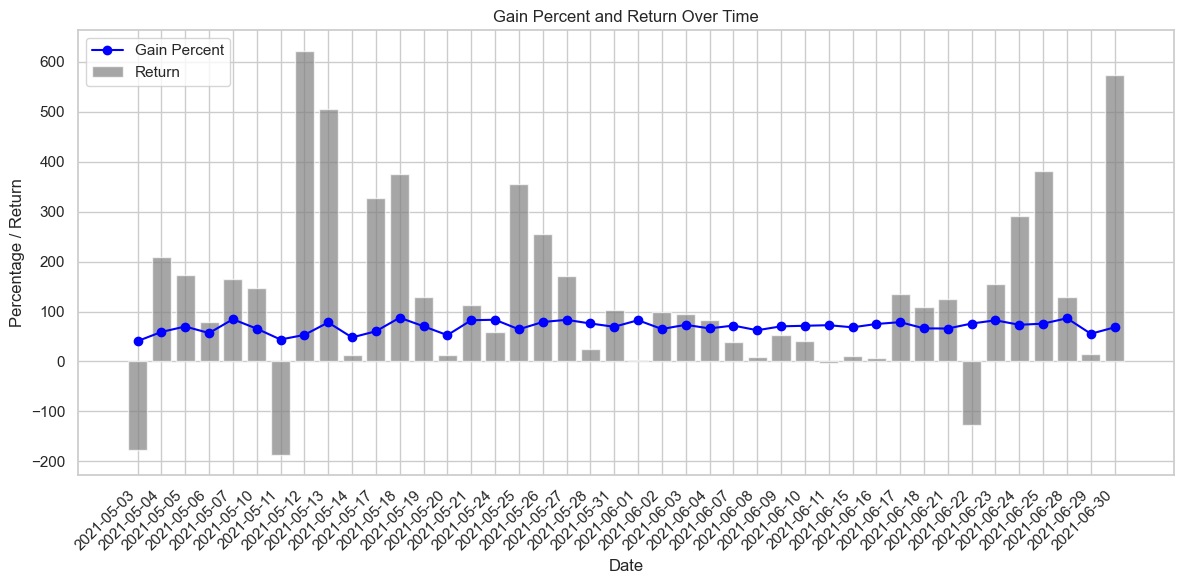

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Assuming 'analysis_df' DataFrame is already created
# If not, uncomment the relevant lines to create it

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the Gain Percent
plt.plot(analysis_df['date'], analysis_df['gain_percent'] * 100, marker='o', label='Gain Percent', color='blue')

# Plotting the Return as bars
plt.bar(analysis_df['date'], analysis_df['return'], label='Return', color='grey', alpha=0.7)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Percentage / Return')
plt.title('Gain Percent and Return Over Time')
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### 第三部分 如何優化

1. 若時間允許，我會用 CNN 模型去學習每一個落底反彈的訊號，再計算成勝率去決定進場量的權重。

2. i. 目前是將交易紀錄做成停利次數、停損次數、回補獲利等指標，再觀察各項指標與獲利的關係。

   ii. 發現我們的報酬和我們的停利比率、停利獲利有很高度的相關。
   
   iii. 再加上我們的平均一天停損單是當天交易總量的17%，而停利佔14%，停利比例較小，為了增加停次次數，我就降低停利標準為 4% ，我們可以發現優化後的策略有效的降低損失。

#### 停損、停利比率

In [39]:
print(analysis_df["stop_loss_percent"].mean())
print(analysis_df["take_gain_percent"].mean())

0.1654036707670078
0.13500776573307482


#### 指標與獲利的相關係數

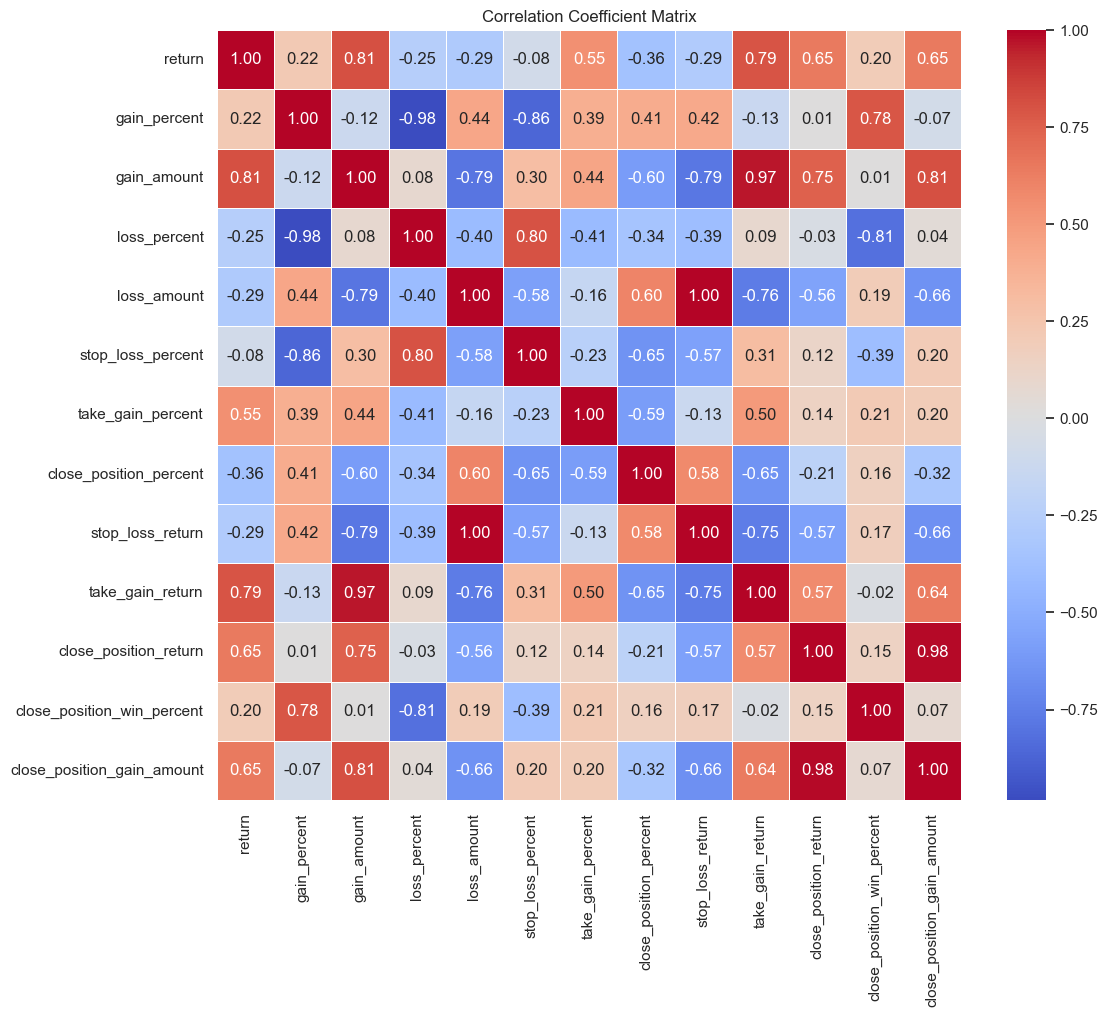

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already executed the code to create 'analysis_df'

# Select columns for correlation analysis
correlation_columns = [
    "return",
    "gain_percent",
    "gain_amount",
    "loss_percent",
    "loss_amount",
    "stop_loss_percent",
    "take_gain_percent",
    "close_position_percent",
    "stop_loss_return",
    "take_gain_return",
    "close_position_return",
    "close_position_win_percent",
    "close_position_gain_amount"
]

# Create a correlation matrix
correlation_matrix = analysis_df[correlation_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficient Matrix')
plt.show()


#### 停利獲利 vs 總獲利

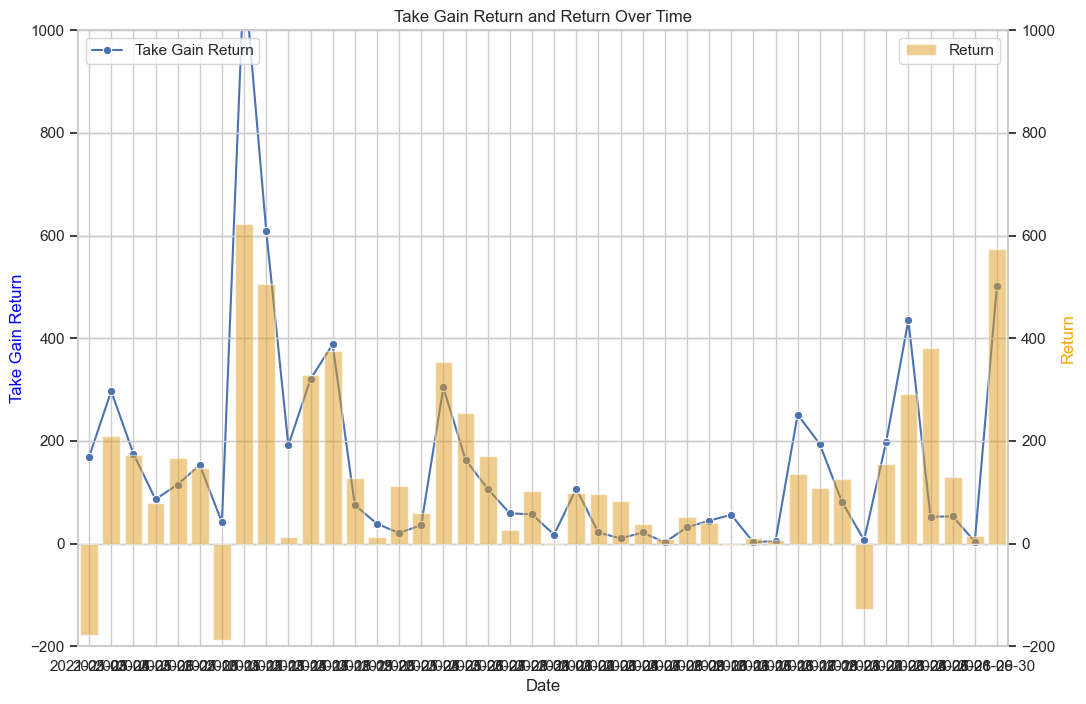

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the 'analysis_df' DataFrame

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot 'take_gain_return' as a line plot
sns.lineplot(x='date', y='take_gain_return', data=analysis_df, ax=ax1, label='Take Gain Return', marker='o')

# Create a bar plot for 'return' on the second y-axis
ax2 = ax1.twinx()
sns.barplot(x='date', y='return', data=analysis_df, ax=ax2, alpha=0.5, color='orange', label='Return')

# Set y-axis limits
ax1.set_ylim(-200, 1000)
ax2.set_ylim(-200, 1000)

# Set axis labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Take Gain Return', color='blue')
ax2.set_ylabel('Return', color='orange')
plt.title('Take Gain Return and Return Over Time')

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


#### 優化後的減低了損失

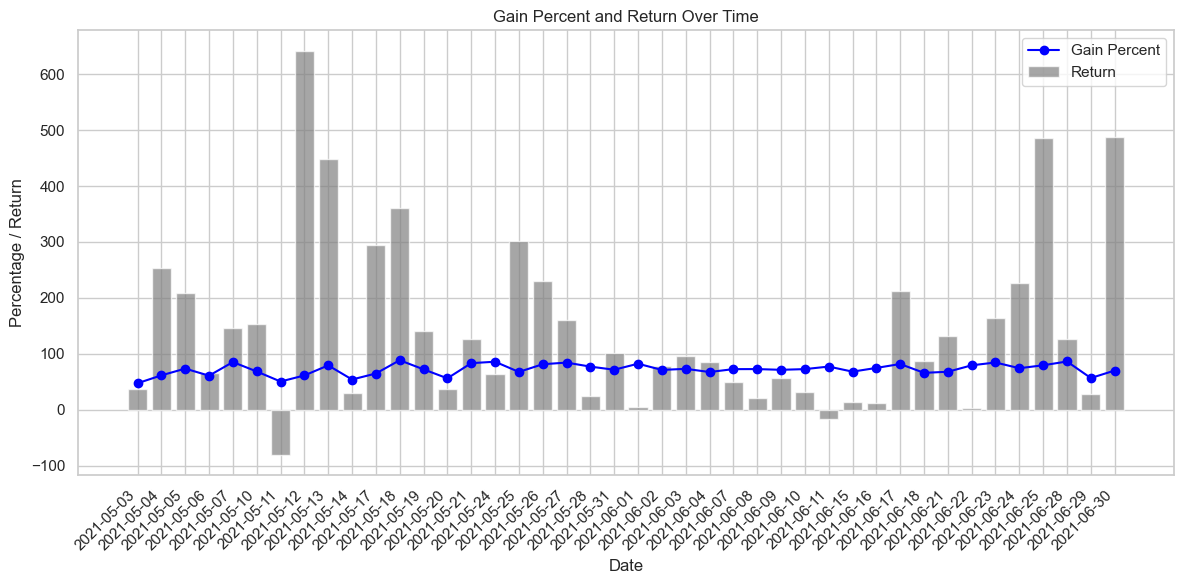

In [36]:

    
filename_list = ["2021-05-03", "2021-05-04", "2021-05-05", "2021-05-06", "2021-05-07",
                 "2021-05-10", "2021-05-11", "2021-05-12", "2021-05-13", "2021-05-14",
                 "2021-05-17", "2021-05-18", "2021-05-19", "2021-05-20", "2021-05-21",
                 "2021-05-24", "2021-05-25", "2021-05-26", "2021-05-27", "2021-05-28",
                 "2021-05-31", "2021-06-01", "2021-06-02", "2021-06-03", "2021-06-04",
                 "2021-06-07", "2021-06-08", "2021-06-09", "2021-06-10", "2021-06-11",
                 "2021-06-15", "2021-06-16", "2021-06-17", "2021-06-18",
                 "2021-06-21", "2021-06-22", "2021-06-23", "2021-06-24", "2021-06-25",
                 "2021-06-28", "2021-06-29", "2021-06-30"]


analysis_dict = { "date" : list(),
                      "transaction_num" : list(),
                      "return" : list(),
                      "gain_percent" : list(),
                      "gain_amount" : list(),
                      "loss_percent" : list(),
                      "loss_amount" : list(),
                      
                      "stop_loss_percent" : list(),
                      "take_gain_percent" : list(),
                      "close_position_percent" : list(),
                      
                      "stop_loss_return" : list(),
                      "take_gain_return" : list(),
                      "close_position_return" : list(),
                      
                      
                      "close_position_win_percent" : list(),
                      
                     
                      "close_position_gain_amount" : list()
}

for i in filename_list:
    
    
    df = pd.read_csv("/Users/stevenkuo/實習/衍盛筆試/" + i + "_trading_record_optimize.csv")
    
    analysis_dict["date"].append(i)
    analysis_dict["transaction_num"].append(len(df))
    analysis_dict["return"].append(sum(df["return"]))
    analysis_dict["gain_percent"].append(len(df[df["return"] >= 0]) / len(df))
    analysis_dict["gain_amount"].append(sum(df[df["return"] >= 0]["return"]))
    analysis_dict["loss_percent"].append(len(df[df["return"] <= 0]) / len(df))
    analysis_dict["loss_amount"].append(sum(df[df["return"] <= 0]["return"]))
    
    analysis_dict["stop_loss_percent"].append(len(df[df["status"] == 0]) / len(df))
    analysis_dict["take_gain_percent"].append(len(df[df["status"] == 1]) / len(df))
    analysis_dict["close_position_percent"].append(len(df[df["status"] == 2]) / len(df))
    
    analysis_dict["stop_loss_return"].append(sum(df[df["status"] == 0]["return"]))
    analysis_dict["take_gain_return"].append(sum(df[df["status"] == 1]["return"]))
    analysis_dict["close_position_return"].append(sum(df[df["status"] == 2]["return"]))
    
    
    analysis_dict["close_position_win_percent"].append(len(df[(df["status"] == 2) & (df["return"] >= 0)]) / len(df[(df["status"] == 2) ]))
    
    
    analysis_dict["close_position_gain_amount"].append(sum(df[(df["status"] == 2) & (df["return"] >= 0)]["return"]))
    
analysis_df_optimize = pd.DataFrame(analysis_dict)
    
    
    
#analysis_df.to_csv("result_analysis_optimize.csv", index=False)



import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Assuming 'analysis_df' DataFrame is already created
# If not, uncomment the relevant lines to create it

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the Gain Percent
plt.plot(analysis_df_optimize['date'], analysis_df_optimize['gain_percent'] * 100, marker='o', label='Gain Percent', color='blue')

# Plotting the Return as bars
plt.bar(analysis_df_optimize['date'], analysis_df_optimize['return'], label='Return', color='grey', alpha=0.7)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Percentage / Return')
plt.title('Gain Percent and Return Over Time')
plt.legend()

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()




#### 原本的獲利 vs 優化後的獲利



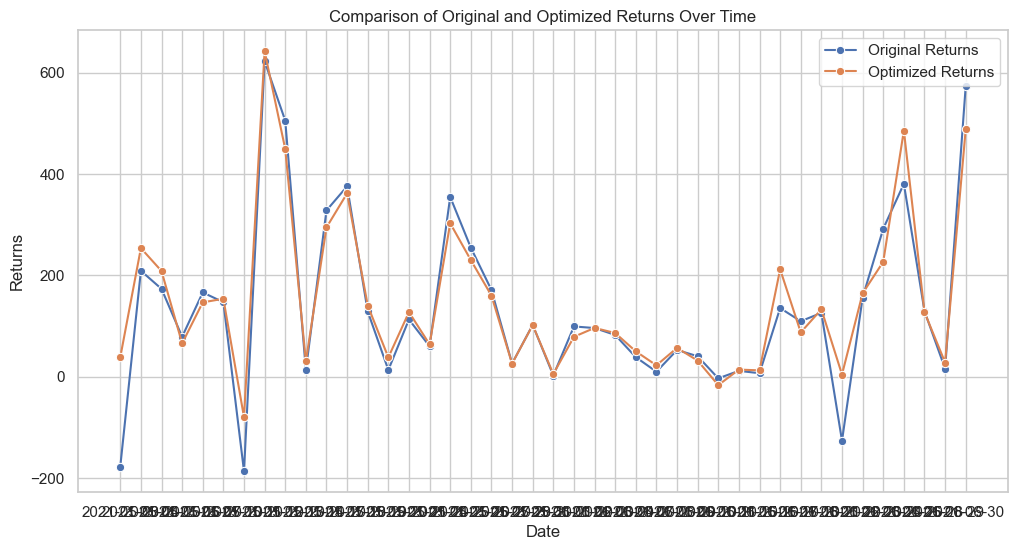

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have another dataframe called analysis_df_optimize with similar structure

# Merge the two dataframes on the 'date' column
merged_df = pd.merge(analysis_df, analysis_df_optimize, on='date', suffixes=('_original', '_optimize'))

# Plotting
plt.figure(figsize=(12, 6))

# Plot original returns
sns.lineplot(x='date', y='return_original', data=merged_df, label='Original Returns', marker='o')

# Plot optimized returns
sns.lineplot(x='date', y='return_optimize', data=merged_df, label='Optimized Returns', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Comparison of Original and Optimized Returns Over Time')
plt.legend()

# Show the plot
plt.show()
